Computing LLE embedding
Done. Reconstruction error: 8.66321e-08


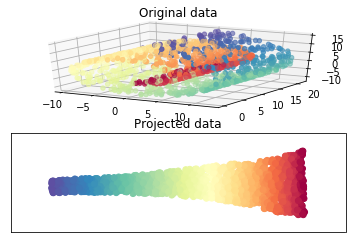

In [34]:
import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D
from sklearn import manifold, datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

In [31]:
import numpy as np

def PCA_project(X, modes):
    # SVD of X
    U, s, VT = np.linalg.svd(X)
    
    # construct S matrix with S_vector -- there must be a better way to do this?
    S = np.zeros([U.shape[0],VT.shape[0]])
    for i in range(modes):
        S[i,i] = s[i]

    print("shapes", X.shape, U.shape,S.shape,VT[:,:modes].shape, (U@S@VT[:,:modes]).shape)
    return U@S@VT[:,:modes]

X_2 = PCA_project(X, 2)

shapes (1500, 3) (1500, 1500) (1500, 3) (3, 2) (1500, 2)


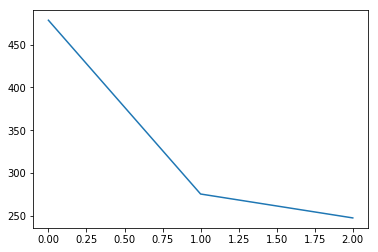

In [26]:
import numpy as np
U, S_vec, VT = np.linalg.svd(X)

modes = 3
S = np.zeros([U.shape[0],VT.shape[0]])
for i in range(modes):
    S[i,i] = S_vec[i]

X_projected = U@S@VT[:,:3]
X_projected.shape

plt.plot(S_vec[:20])
plt.show()

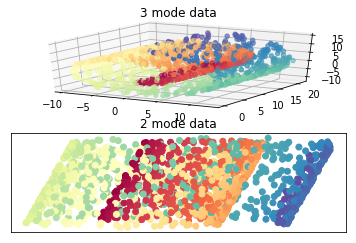

In [33]:
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X_projected[:, 0], X_projected[:, 1], X_projected[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("3 mode data")
ax = fig.add_subplot(212)
ax.scatter(X_2[:, 0], X_2[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('2 mode data')
plt.show()